Enter the region name:  New York, NY


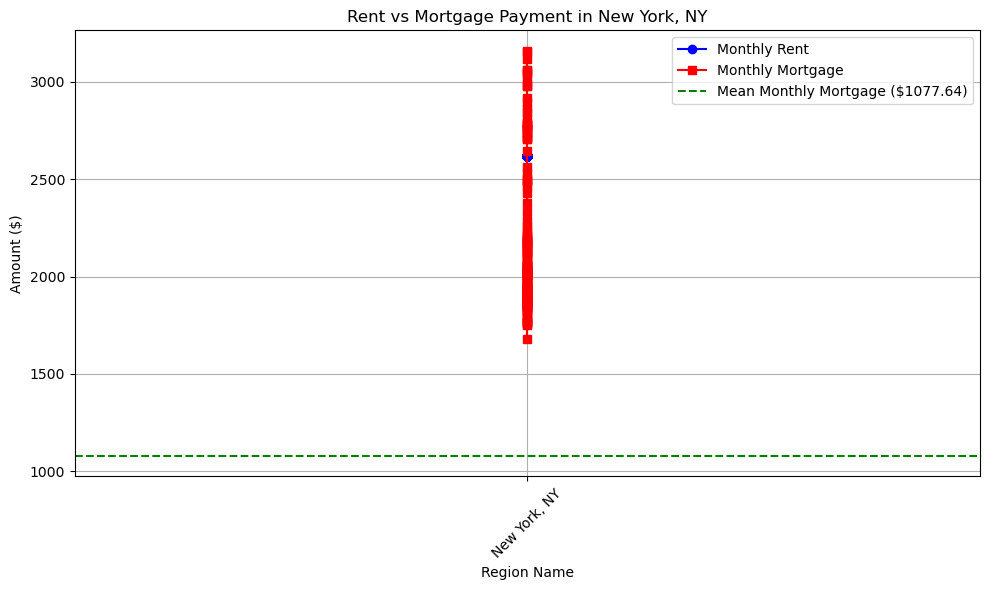

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the rental data from the CSV file
rental_data = pd.read_csv('Cleaned_Data/cleaned_state_rentals.csv')

# Load the cleaned median sales price data from the provided CSV file
median_sales_data = pd.read_csv('Cleaned_Data/cleaned_median_sales.csv')

# Define the mortgage calculation function
def calculate_monthly_mortgage(median_price):
    down_payment_percentage = 0.20
    loan_amount = median_price * (1 - down_payment_percentage)
    annual_interest_rate = 0.0711  # 7.11% interest rate
    mortgage_term_years = 30

    monthly_interest_rate = annual_interest_rate / 12
    total_payments = mortgage_term_years * 12

    monthly_payment = loan_amount * (monthly_interest_rate * (1 + monthly_interest_rate) ** total_payments) / \
                      ((1 + monthly_interest_rate) ** total_payments - 1)

    return monthly_payment

# Calculate the average rent for each region
average_rent_by_region = rental_data.groupby('Region Name')['Monthly Rent'].mean().reset_index()

# Merge rental data with median sales price data
rent_vs_sales = pd.merge(average_rent_by_region, median_sales_data, on='Region Name')

# Calculate the monthly mortgage payment for each region
rent_vs_sales['Monthly Mortgage'] = rent_vs_sales['Median Sale Price'].apply(calculate_monthly_mortgage)

# Calculate the mean monthly mortgage across all regions
mean_monthly_mortgage = rent_vs_sales['Monthly Mortgage'].mean()

# Function to plot the line chart
def plot_line_chart(region_name):
    region_data = rent_vs_sales[rent_vs_sales['Region Name'] == region_name]

    if region_data.empty:
        print("Region not found.")
        return

    plt.figure(figsize=(10, 6))
    plt.plot(region_data['Region Name'], region_data['Monthly Rent'], marker='o', label='Monthly Rent', color='blue')
    plt.plot(region_data['Region Name'], region_data['Monthly Mortgage'], marker='s', label='Monthly Mortgage', color='red')
    
    # Plotting the mean monthly mortgage as a horizontal line
    plt.axhline(y=mean_monthly_mortgage, color='green', linestyle='--', label=f'Mean Monthly Mortgage (${mean_monthly_mortgage:.2f})')
    
    plt.title(f'Rent vs Mortgage Payment in {region_name}')
    plt.xlabel('Region Name')
    plt.ylabel('Amount ($)')
    plt.xticks(rotation=45)
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# User input for region name
region_name_input = input("Enter the region name: ")

# Plot the line chart for the specified region
plot_line_chart(region_name_input)


In [ ]:
New York, Ny